STEP 1: Importing useful libraries 

In [3]:
# pip install --upgrade yfinance (run this command in future to update yfinance).

import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model as lm
from datetime import datetime



STEP 2: Importing/Downloading the Stock Data

In [4]:
tickers = ["AAPL", "AMZN", "META", "GOOGL", "TSLA", "NVDA"]
start_date = "2024-02-01"
end_date = "2025-02-01"

stock_data = yf.download( tickers, start=start_date, end=end_date, auto_adjust=False)

[*********************100%***********************]  6 of 6 completed


STEP 3: Calculate and Display Financial Statistics

STEP 3A: Calculate and Plot the Adjusted Closing Prices Over Time

<function matplotlib.pyplot.show(close=None, block=None)>

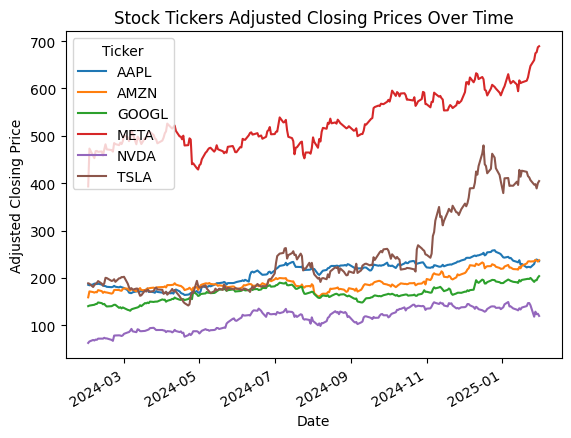

In [7]:
adjusted_closing_prices = stock_data["Adj Close"]
adjusted_closing_prices.plot()
plt.title("Stock Tickers Adjusted Closing Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Adjusted Closing Price")
plt.savefig("Adjusted Closing Prices.pdf")
plt.show

STEP 3B: Calculate and Plot the Daily Simple Rate of Return Over Time

<function matplotlib.pyplot.show(close=None, block=None)>

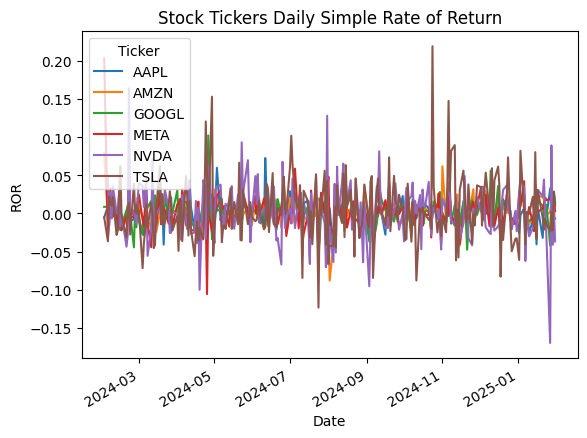

In [8]:
adjusted_closing_prices = stock_data["Adj Close"]
daily_return_adj_closing_prices = adjusted_closing_prices.pct_change()
daily_return_adj_closing_prices.plot()
plt.title("Stock Tickers Daily Simple Rate of Return")
plt.xlabel("Date")
plt.ylabel("ROR")
plt.show

STEP 3C: Create Subplots of Daily Simple Rate of Return

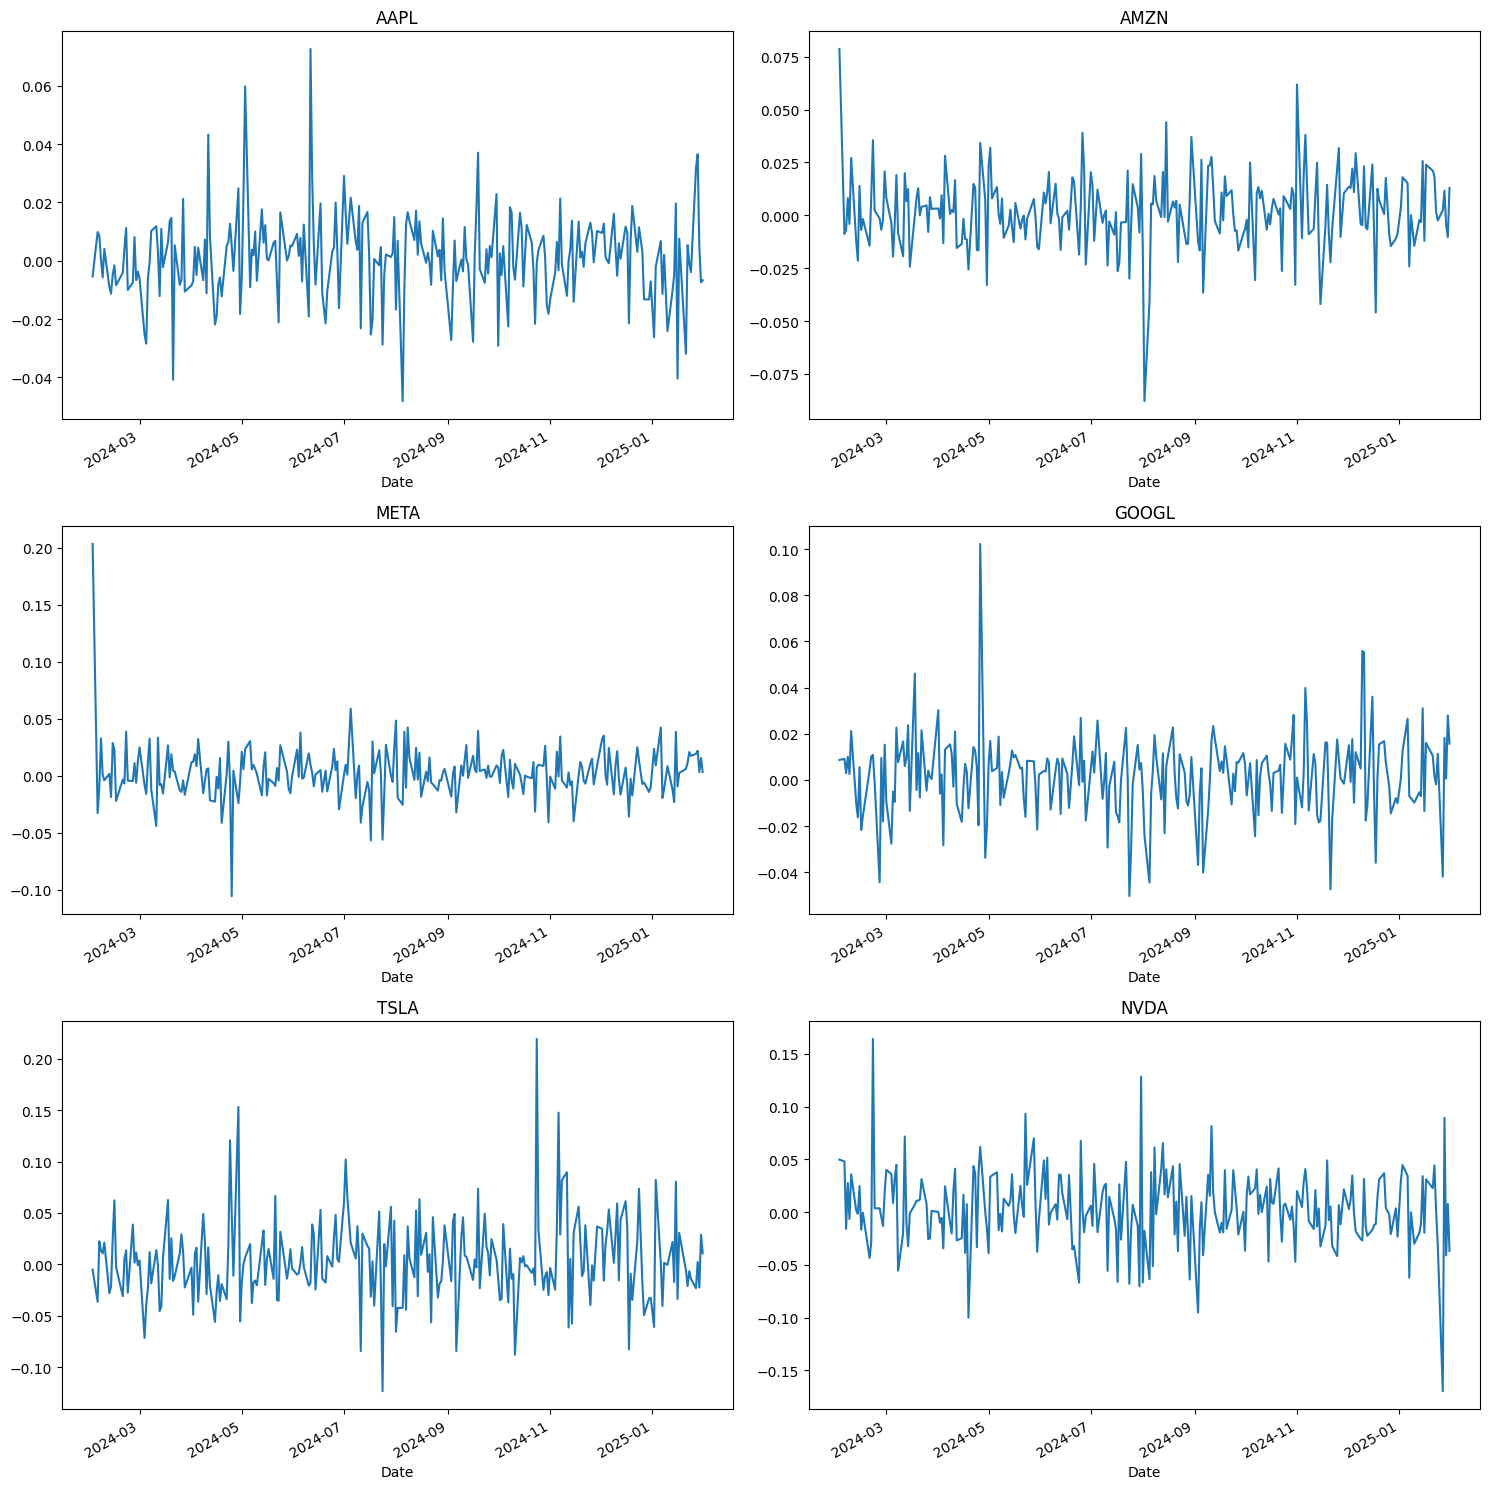

In [9]:
plt.figure( figsize=(15, 15) )
adj_close = stock_data['Adj Close']

for i in range(len(tickers)):
    plt.subplot(3, 2, i + 1)
    adj_close[tickers[i]].pct_change().plot(title=tickers[i])
    
plt.tight_layout()    

STEP 3D: Calculate and Plot the Mean of each Tech Stock's Daily Simple Rate of Return

In [10]:
daily_return_adj_closing_prices = adjusted_closing_prices.pct_change()
daily_mean = daily_return_adj_closing_prices.mean()
print(type(daily_mean))
print(daily_mean)

<class 'pandas.core.series.Series'>
Ticker
AAPL     0.001061
AMZN     0.001758
GOOGL    0.001639
META     0.002507
NVDA     0.003224
TSLA     0.003835
dtype: float64


In [11]:
daily_mean.keys()
heights = []
for key in daily_mean.keys():

    heights.append(daily_mean[key])
    
print(heights)

x_pos = np.arange(len(daily_mean.keys()))
x_pos

[np.float64(0.0010607086339356356), np.float64(0.0017582043464339373), np.float64(0.00163881008889307), np.float64(0.0025073465504368026), np.float64(0.003224311230933886), np.float64(0.0038350191394763123)]


array([0, 1, 2, 3, 4, 5])

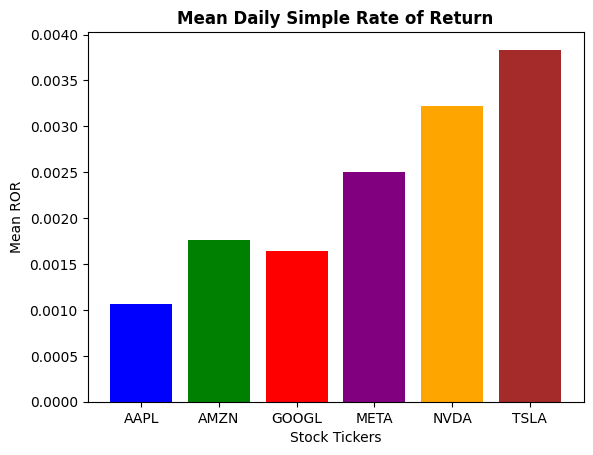

In [12]:
colors = [ "blue", "green", "red", "purple", "orange", "brown" ]

# plot bars
plt.bar(x_pos, heights, color = colors)
 
# create names on the x-axis
plt.xticks(x_pos, daily_mean.keys())

# label chart
plt.title("Mean Daily Simple Rate of Return", fontweight = "bold")
plt.xlabel("Stock Tickers")
plt.ylabel("Mean ROR")

# show graphic
plt.show()

STEP 3E Calculate and Plot the Variance for Each Stock

In [13]:
daily_return_adj_closing_prices = adjusted_closing_prices.pct_change()
daily_var = daily_return_adj_closing_prices.var()
print(type(daily_var))
print(daily_var)

<class 'pandas.core.series.Series'>
Ticker
AAPL     0.000215
AMZN     0.000313
GOOGL    0.000303
META     0.000540
NVDA     0.001286
TSLA     0.001612
dtype: float64


In [14]:
daily_var.keys()
var_indices = []
var_labels = []
var_heights = []
for i in range(len(daily_var.keys())):
    var_indices.append(i)
    var_labels.append(daily_var.keys()[i])
    var_heights.append(daily_var.iloc[i])
print(var_indices)
print(var_labels)
print(var_heights)

[0, 1, 2, 3, 4, 5]
['AAPL', 'AMZN', 'GOOGL', 'META', 'NVDA', 'TSLA']
[np.float64(0.00021538197681150677), np.float64(0.00031282878638803474), np.float64(0.00030307172988739903), np.float64(0.0005395837216481071), np.float64(0.0012864225643334935), np.float64(0.0016117043204448517)]


Text(0, 0.5, 'Mean ROR')

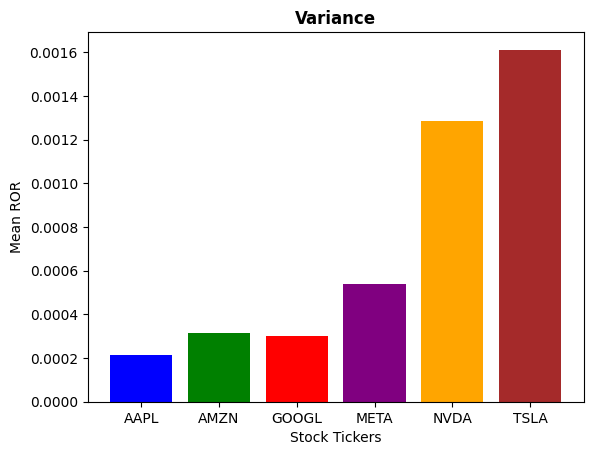

In [15]:
ax2 = plt.subplot()
plt.bar(var_indices, var_heights, color = colors)
ax2.set_xticks(var_indices)
ax2.set_xticklabels(var_labels)
plt.title("Variance", fontweight="bold")
plt.xlabel("Stock Tickers")
plt.ylabel("Mean ROR")

STEP 3F Calculate and Plot the Standard Deviation for Each Stock

In [16]:
daily_return_adj_closing_prices = adjusted_closing_prices.pct_change()
daily_std = daily_return_adj_closing_prices.std()
print(type(daily_std))
print(daily_std)

<class 'pandas.core.series.Series'>
Ticker
AAPL     0.014676
AMZN     0.017687
GOOGL    0.017409
META     0.023229
NVDA     0.035867
TSLA     0.040146
dtype: float64


In [17]:
daily_std.keys()
std_heights = []
for key in daily_std.keys():
    std_heights.append(daily_std[key])
std_heights

[np.float64(0.01467589781960568),
 np.float64(0.017686966568296405),
 np.float64(0.01740895545078449),
 np.float64(0.023228941466371365),
 np.float64(0.03586673339368242),
 np.float64(0.04014603741896393)]

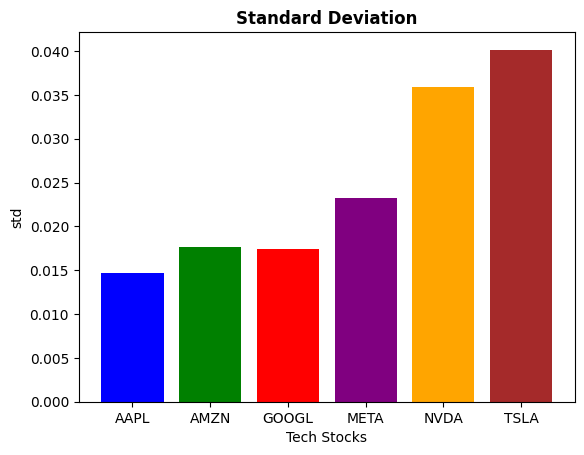

In [18]:
x_pos = np.arange(len(daily_std.keys()))
x_pos
plt.bar(x_pos, std_heights, color=colors)
plt.xticks( x_pos, daily_std.keys())
plt.title("Standard Deviation", fontweight="bold")
plt.xlabel("Tech Stocks")
plt.ylabel("std")
plt.show()

STEP 3G: Calculate Correlations

In [28]:
stock_data_correlation = daily_return_adj_closing_prices.corr()
stock_data_correlation.to_csv("stock_data_correlation.csv", index = False)
stock_data_correlation

Ticker,AAPL,AMZN,GOOGL,META,NVDA,TSLA
Ticker,,,,,,
AAPL,1.000000,0.311830,0.308671,0.214866,0.211746,0.340881
AMZN,0.311830,1.000000,0.525355,0.575901,0.425134,0.339449
GOOGL,0.308671,0.525355,1.000000,0.386035,0.347263,0.296555
META,0.214866,0.575901,0.386035,1.000000,0.352275,0.159311
NVDA,0.211746,0.425134,0.347263,0.352275,1.000000,0.231235
TSLA,0.340881,0.339449,0.296555,0.159311,0.231235,1.000000


STEP 3H: Regression Analysis

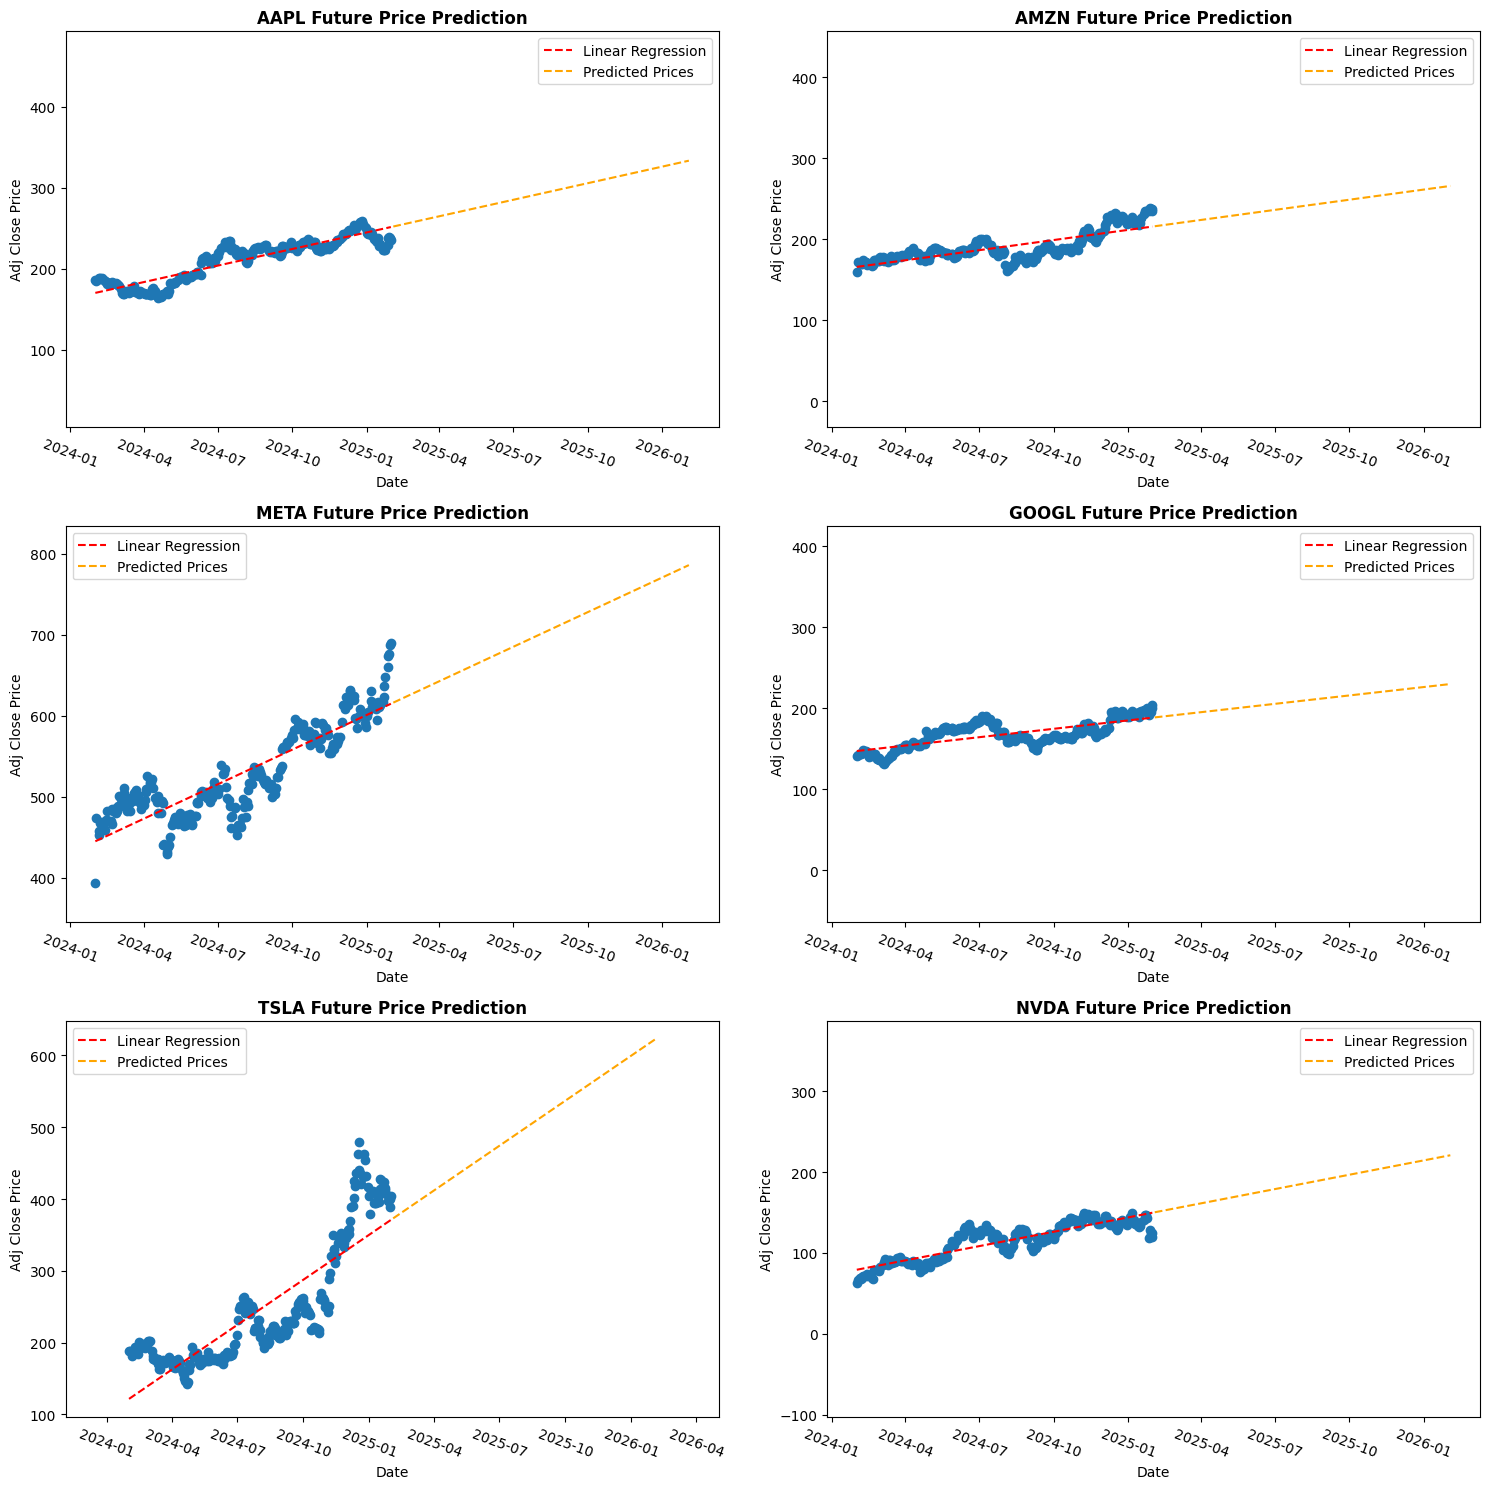

In [21]:
acp = adjusted_closing_prices

seperate_df = []
for i in range(len(acp.keys())):
    
    seperate_df.append(acp[tickers[i]].reset_index())

# X will be the same for each stock
X = seperate_df[0]["Date"]

# Step 1: Convert 'Date' column to datetime format
X = pd.to_datetime(seperate_df[0]["Date"])

# Step 2: Convert datetime to numerical format (Days since first date)
X_numeric = (X - X.min()).dt.days  # Converts to small numbers

# Step 3: Reshape X into 2D array (required for sklearn)
X_reshaped = X_numeric.values.reshape(-1, 1)

# Y_values is a list containing 6 different sets of closing prices for each stock
y_values = []
for j in range(len(acp.keys())):

    y_values.append(seperate_df[j][tickers[j]])

# Predicting y values for all six stocks
regr = []
y_predict = []

for i in range(len(acp.keys())):

    model = lm.LinearRegression()
    model.fit(X_reshaped, y_values[i])
    y_pred = model.predict(X_reshaped)

    regr.append(model)
    y_predict.append(y_pred)
    
plt.figure( figsize=(15,15) )
for i, (ticker, y, y_pred) in enumerate (zip(tickers, y_values, y_predict), start=1):

    plt.subplot(3, 2, i)
    plt.scatter(X, y)
    plt.plot(X, y_pred, label="Linear Regression", color='red', linestyle="--")
    plt.title(ticker)
    plt.xlabel("Date")
    plt.ylabel("Adj Close Price")

# Create a date range excluding weekends
x_future = pd.date_range(start="2025-02-03", end="2026-02-03", freq='B')

# Convert it into a Pandas Series
x_future_series = pd.Series(x_future)

# Convert to numerical format
x_future_numeric = (x_future - X.min()).days.values.reshape(-1, 1)

# Predict future prices
y_future_predict = []

for i in range(len(acp.keys())):
    
    y_f_pred = regr[i].predict(x_future_numeric)
    y_future_predict.append(y_f_pred)

# Plot future predictions


for i, (ticker, y_f_pred) in enumerate (zip(tickers, y_future_predict), start=1):

    plt.subplot(3, 2, i)
    plt.plot(x_future, y_f_pred, label="Predicted Prices", color='orange', linestyle="--")
    plt.axis("equal")
    plt.xticks(rotation=-20)
    plt.title( str(ticker) + " Future Price Prediction", fontweight='bold' )
    plt.xlabel("Date")
    plt.ylabel("Adj Close Price")
    plt.legend()
plt.tight_layout()

# print("The slope of the line is " + str(regr_a.coef_[0]) )
# print("The intercept of the line is " + str(regr_a.intercept_) )

STEP 4: Optimised Portfolio

STEP 4A: Perfroming a mean-variance portfolio optimisation that shows the efficient frontier for a group of stocks

In [24]:
# The following function takes in daily mean returns and covariance between stocks and returns 5000 random portfolios
def return_portfolios(expected_returns, cov_matrix):
  np.random.seed(1)
  port_returns = []
  port_volatility = []
  stock_weights = []
    
  selected = (expected_returns.axes)[0]
    
  num_assets = len(selected) 
  num_portfolios = 5000
    
  for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, expected_returns)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)
    
    portfolio = {'Returns': port_returns,
                 'Volatility': port_volatility}
    
  for counter,symbol in enumerate(selected):
    portfolio[symbol +' Weight'] = [Weight[counter] for Weight in stock_weights]
    
  df = pd.DataFrame(portfolio)
    
  column_order = ['Returns', 'Volatility'] + [stock+' Weight' for stock in selected]
    
  df = df[column_order]
   
  return df


import cvxopt as opt
from cvxopt import blas, solvers
solvers.options['show_progress'] = False

# The following function returns the mean-variance optimised portfolios (calculating the efficient frontier). This function returns weights, returnsm, and risks
def optimal_portfolio(returns):
    n = returns.shape[1]
    returns = np.transpose(returns.values)

    N = 100
    mus = [10**(5.0 * t/N - 1.0) for t in range(N)]

    # Convert to cvxopt matrices
    S = opt.matrix(np.cov(returns))
    pbar = opt.matrix(np.mean(returns, axis=1))

    # Create constraint matrices
    G = -opt.matrix(np.eye(n))   # negative n x n identity matrix
    h = opt.matrix(0.0, (n ,1))
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix(1.0)

    # Calculate efficient frontier weights using quadratic programming
    portfolios = [solvers.qp(mu*S, -pbar, G, h, A, b)['x']
                  for mu in mus]
    
    ## CALCULATE RETURNS, RISKS, AND WEIGHTS FOR FRONTIER
    returns = [blas.dot(pbar, x) for x in portfolios]
    risks = [np.sqrt(blas.dot(x, S*x)) for x in portfolios]
    weights = np.array([np.array(x).flatten() for x in portfolios])
    
    ## CALCULATE THE 2ND DEGREE POLYNOMIAL OF THE FRONTIER CURVE
    m1 = np.polyfit(returns, risks, 2)
    x1 = np.sqrt(m1[2] / m1[0])
    # CALCULATE THE OPTIMAL PORTFOLIO
    wt = solvers.qp(opt.matrix(x1 * S), -pbar, G, h, A, b)['x']

    # CALULATE RETURN AND RISK FOR OPTIMAL PORTFOLIO
    opt_return = blas.dot(pbar, wt) 
    opt_risk = np.sqrt(blas.dot(wt, S * wt))  

    return weights, returns, risks, np.asarray(wt), opt_return, opt_risk

STEP 4B: Portfolios that optimise for both expected returns and volatility (risk of our assets)

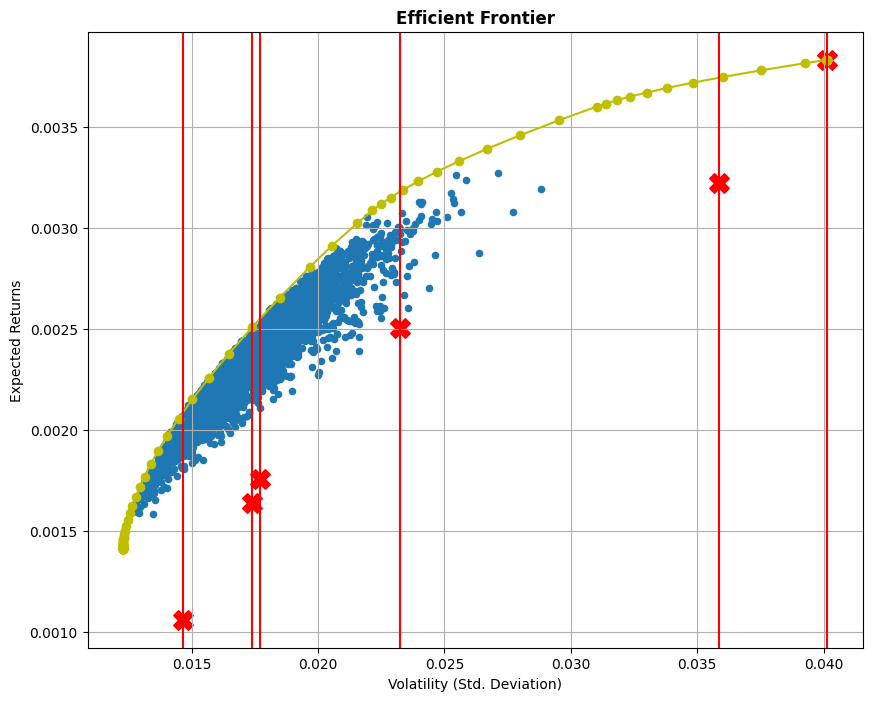

          Return      Risk
Ticker                    
AAPL    0.001061  0.014676
AMZN    0.001758  0.017687
GOOGL   0.001639  0.017409
META    0.002507  0.023229
NVDA    0.003224  0.035867
TSLA    0.003835  0.040146

DataFrame Name: Portfolios on Efficient Frontier


Ticker,AAPL,AMZN,GOOGL,META,NVDA,TSLA,Return,Risk
0,1.835263e-07,2.358889e-07,2.262072e-07,3.017332e-07,7.676747e-08,9.999990e-01,0.003835,0.040146
1,1.733978e-07,2.215487e-07,2.128836e-07,2.780431e-07,7.744238e-08,9.999990e-01,0.003835,0.040146
2,1.607251e-07,2.035657e-07,1.961596e-07,2.483578e-07,7.853376e-08,9.999991e-01,0.003835,0.040146
3,1.449532e-07,1.810611e-07,1.752250e-07,2.110623e-07,8.016462e-08,9.999992e-01,0.003835,0.040146
4,1.254573e-07,1.529805e-07,1.491171e-07,1.640924e-07,8.248017e-08,9.999993e-01,0.003835,0.040146
5,1.016662e-07,1.181936e-07,1.168272e-07,1.048990e-07,8.572047e-08,9.999995e-01,0.003835,0.040146
6,7.276713e-08,7.506868e-08,7.689792e-08,2.983195e-08,9.005119e-08,9.999997e-01,0.003835,0.040146
7,6.541537e-08,6.554132e-08,6.776856e-08,3.132372e-08,3.993469e-07,9.999994e-01,0.003835,0.040146
8,5.634634e-08,5.373210e-08,5.647283e-08,3.336994e-08,8.558738e-07,9.999989e-01,0.003835,0.040146
9,4.518718e-08,3.896168e-08,4.241079e-08,3.658859e-08,1.680851e-06,9.999982e-01,0.003835,0.040146


In [25]:
# Now we must find the portfolios that optimise for both expected returns and volatility (risk of our assets)
daily_return_adj_closing_prices = adjusted_closing_prices.pct_change()
daily_mean_expected_returns = daily_return_adj_closing_prices.mean()

stock_daily_returns_cov = daily_return_adj_closing_prices.cov()

random_portfolios = return_portfolios(daily_mean_expected_returns, stock_daily_returns_cov)

weights, returns, risks, opt_weights, opt_return, opt_risk = optimal_portfolio(daily_return_adj_closing_prices[1:])

single_asset_std=np.sqrt(np.diagonal(stock_daily_returns_cov))

random_portfolios.plot.scatter(x='Volatility', y='Returns', figsize=(10, 8), grid=True)
try:
    plt.plot(risks, returns, 'y-o')
    plt.scatter(single_asset_std, daily_mean_expected_returns, marker='X',color='red',s=200)
    for xc in single_asset_std:
        plt.axvline(x=xc, color="red")
except:
    pass
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier', fontweight='bold')
plt.show()

df = pd.DataFrame(daily_mean_expected_returns, columns=["Return"])
df["Risk"] = daily_return_adj_closing_prices.std()
print(df)

pd.set_option('display.max_rows', 100)  # Show at most 100 rows
weights_data = pd.DataFrame(weights)
weights_data.name = "Portfolios on Efficient Frontier"

weights_data.columns = daily_return_adj_closing_prices[1:].keys()
weights_data["Return"] = pd.DataFrame(returns)
weights_data["Risk"] = pd.DataFrame(risks)
print(f"\nDataFrame Name: {weights_data.name}")
weights_data

# Note: Having multiple uncorrelated assets in the same portfolio will significantly reduce the volatility (in some cases the portfolio volatility may be smaller than the least volatile asset).

STEP 4C: Optimal Portfolio

In [77]:
# Optimal Portfolio
optimal_weights = pd.DataFrame(opt_weights)
optimal_weights = optimal_weights.T
optimal_weights.name = "Optimal Portfolio"

optimal_weights.columns = daily_return_adj_closing_prices[1:].keys()
optimal_weights["Return"] = opt_return
optimal_weights["Risk"] = opt_risk
print(f"DataFrame Name: {optimal_weights.name}")
optimal_weights


DataFrame Name: Optimal Portfolio


Ticker,AAPL,AMZN,GOOGL,META,NVDA,TSLA,Return,Risk
0,2.194276e-07,2.901997e-07,2.754237e-07,4.023088e-07,8.170437e-08,0.999999,0.003835,0.040146


STEP 5: Extract additional info such as sector, industry, and news articles

In [26]:
t_symbol = []
t_sector = []
t_industry = []
t_news = []

for symbol in tickers:

    ts = yf.Ticker(symbol)
    t_symbol.append(ts)
    t_sector.append(ts.info.get("sector", "N/A"))
    t_industry.append(ts.info.get("industry", "N/A"))
    t_news.append(ts.news if hasattr(ts, "news") else [])

# Display the results
for i in range(len(tickers)):
    
    print(f"Stock: {t_symbol[i].info.get('longName', 'Unknown Stock')}")
    print(f"Sector: {t_sector[i]}")
    print(f"Industry: {t_industry[i]} \n")

import json

c = 0
for n in t_news:

    print(f"\n📌 Latest News: {t_symbol[c].info.get('longName', 'Unknown Stock')}")
    c += 1

    if n:
        for idx, item in enumerate(n[:5], start=1):
            title = item["content"].get("title", "No title available")
            link = item["content"].get("canonicalUrl", {}).get("url", "No link available")
            pub_date = item["content"].get("pubDate", "Unknown Date")
    
            # Convert ISO format date to readable format
            try:
                pub_date = datetime.strptime(pub_date, "%Y-%m-%dT%H:%M:%SZ").strftime("%B %d, %Y %I:%M %p")
            except ValueError:
                pass  # Use default "Unknown Date" if format is incorrect
    
            print(f"{idx}. 📰 {title}\n   📅 Published: {pub_date}\n   🔗 {link}\n")
            
# Save news data for each stock in a separate file
for symbol, news in zip(tickers, t_news):
    file_name = f"{symbol.lower()}_news.json"  # Generate filename dynamically
    with open(file_name, "w") as json_file:
        json.dump(news, json_file, indent=4)
    print(f"✅ News data saved as {file_name}")


Stock: Apple Inc.
Sector: Technology
Industry: Consumer Electronics 

Stock: Amazon.com, Inc.
Sector: Consumer Cyclical
Industry: Internet Retail 

Stock: Meta Platforms, Inc.
Sector: Communication Services
Industry: Internet Content & Information 

Stock: Alphabet Inc.
Sector: Communication Services
Industry: Internet Content & Information 

Stock: Tesla, Inc.
Sector: Consumer Cyclical
Industry: Auto Manufacturers 

Stock: NVIDIA Corporation
Sector: Technology
Industry: Semiconductors 


📌 Latest News: Apple Inc.
1. 📰 Why Tesla stock still has a fan in Cathie Wood
   📅 Published: March 03, 2025 02:25 PM
   🔗 https://finance.yahoo.com/news/why-tesla-stock-still-has-a-fan-in-cathie-wood-142550009.html

2. 📰 Why more big deals are coming in the music industry
   📅 Published: March 03, 2025 01:32 PM
   🔗 https://finance.yahoo.com/news/why-more-big-deals-are-coming-in-the-music-industry-133205910.html

3. 📰 Magnificent Seven Stocks: Nvidia Dives; Amazon, Tesla Sell Off
   📅 Published: Marc